### Counting Rice and Displaying
#### Theory
In this lab, we explore the application of image processing techniques to analyze and segment objects in an image. Specifically, we focus on detecting and characterizing rice grains in a grayscale image using the following steps:
1. **Image Thresholding**: We apply Otsu's thresholding method to convert the grayscale image into a binary image, separating the foreground (rice grains) from the background.
2. **Morphological Operations**: To clean up the binary image, we use morphological operations such as removing small objects and filling small holes. This ensures that the segmented regions represent meaningful objects.
3. **Labeling and Region Properties**: The cleaned binary image is labeled to identify individual connected components. We then compute region properties such as area, perimeter, and major axis length for each labeled region.
4. **Filtering Regions**: Based on specific criteria (e.g., area range), we filter out regions that do not correspond to valid rice grains.
5. **Visualization**: Finally, we visualize the segmented rice grains by overlaying labels and centroids on the original image. This helps in verifying the accuracy of the segmentation and analysis.
Through this lab, we gain insights into the practical use of image processing libraries like OpenCV and scikit-image for object detection and analysis.
#### Objectives
- Understand the process of image thresholding and its role in separating objects from the background.
- Learn how to apply morphological operations to clean up binary images.
- Explore the use of region properties to analyze labeled components in an image.
- Develop skills to filter and visualize segmented objects based on specific criteria.
- Gain hands-on experience with OpenCV and scikit-image libraries for image processing tasks.

In [13]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, color
from skimage.measure import regionprops
from skimage.segmentation import clear_border

Total rice grains detected: 32

Rice #1
  Area             : 208.0
  Perimeter        : 64.77
  Major Axis Length: 28.75

Rice #2
  Area             : 405.0
  Perimeter        : 123.64
  Major Axis Length: 45.77

Rice #3
  Area             : 219.0
  Perimeter        : 66.63
  Major Axis Length: 29.35

Rice #4
  Area             : 201.0
  Perimeter        : 67.70
  Major Axis Length: 30.79

Rice #5
  Area             : 213.0
  Perimeter        : 69.25
  Major Axis Length: 31.27

Rice #6
  Area             : 200.0
  Perimeter        : 65.56
  Major Axis Length: 30.43

Rice #7
  Area             : 221.0
  Perimeter        : 68.38
  Major Axis Length: 31.80

Rice #8
  Area             : 206.0
  Perimeter        : 65.70
  Major Axis Length: 29.55

Rice #9
  Area             : 209.0
  Perimeter        : 64.87
  Major Axis Length: 28.90

Rice #10
  Area             : 209.0
  Perimeter        : 66.67
  Major Axis Length: 31.23

Rice #11
  Area             : 234.0
  Perimeter        : 70.91
  M

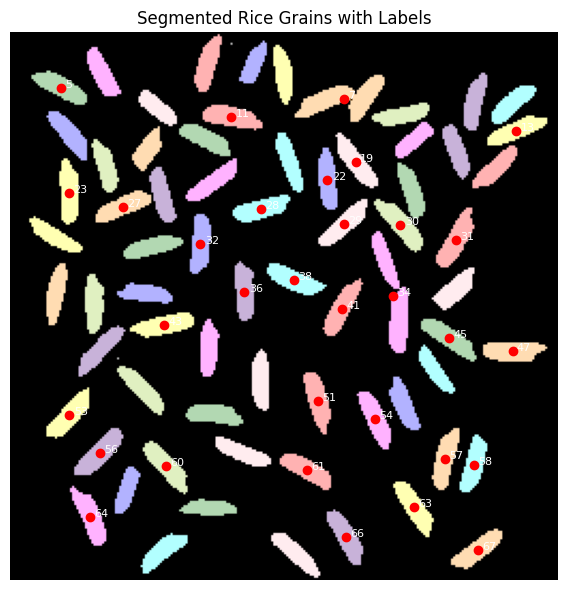

In [14]:

image = cv2.imread("stdimgs/rice.png", cv2.IMREAD_GRAYSCALE)

threshold = filters.threshold_otsu(image)
binary = image > threshold

cleaned = morphology.remove_small_objects(binary, min_size=100)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=100)
cleaned = clear_border(cleaned)

labeled_image = measure.label(cleaned)
regions = regionprops(labeled_image)

filtered_regions = [r for r in regions if 200 <= r.area <= 2000]

print(f"Total rice grains detected: {len(filtered_regions)}\n")
for i, region in enumerate(filtered_regions, 1):
    print(f"Rice #{i}")
    print(f"  Area             : {region.area}")
    print(f"  Perimeter        : {region.perimeter:.2f}")
    print(f"  Major Axis Length: {region.major_axis_length:.2f}")
    print()

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(color.label2rgb(labeled_image, image=image, bg_label=0), cmap="gray")

for region in filtered_regions:
    y, x = region.centroid
    ax.plot(x, y, "ro")
    ax.text(x + 2, y, str(region.label), color="white", fontsize=8)

plt.title("Segmented Rice Grains with Labels")
plt.axis("off")
plt.tight_layout()
plt.show()